# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Labiba Adinda Zahwana
- **Email:** labibaadinda11@gmail.com
- **ID Dicoding:** labibaadinda

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana tren penjualan dari tahun 2016 hingga 2018?
- Pertanyaan 2: Berapa persen pesanan yang diantarkan terlambat dibandingkan dengan total pesanan yang berhasil dikirim?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
from zipfile import ZipFile
import os
from io import BytesIO
from collections import Counter
from functools import reduce
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 1. Data Wrangling

 ### 1.1 Gathering Data

#### 1.1.1 Read Data

In [2]:
zip_path = '/content/E-commerce-public-dataset.zip'
with ZipFile(zip_path, 'r') as z:
  list_file = z.namelist()
  data_frames = {} # directory untuk menyimpan semua data csv dari zip
  # loop untuk baca tiap file csv dlm zip
  for file in list_file:
    with z.open(file) as f:
      df = pd.read_csv(f)
      data_frames[file] = df
      print(f"Data dari {file} berhasil dibaca.")

Data dari E-Commerce Public Dataset/customers_dataset.csv berhasil dibaca.
Data dari E-Commerce Public Dataset/geolocation_dataset.csv berhasil dibaca.
Data dari E-Commerce Public Dataset/order_items_dataset.csv berhasil dibaca.
Data dari E-Commerce Public Dataset/order_payments_dataset.csv berhasil dibaca.
Data dari E-Commerce Public Dataset/order_reviews_dataset.csv berhasil dibaca.
Data dari E-Commerce Public Dataset/orders_dataset.csv berhasil dibaca.
Data dari E-Commerce Public Dataset/product_category_name_translation.csv berhasil dibaca.
Data dari E-Commerce Public Dataset/products_dataset.csv berhasil dibaca.
Data dari E-Commerce Public Dataset/sellers_dataset.csv berhasil dibaca.


#### 1.1.2 Head dari file-file csv

Menampilkan 5 teratas dari masing masing data Frame


In [3]:
semua_kolom = [] # array untuk simpan data semua kolom
# Display the first few rows of each DataFrame in data_frames
for df_name, df in data_frames.items():
    print(f"\nHead of {df_name}:")
    print(df.head())
    print("-----------------------------------------------------------------")



Head of E-Commerce Public Dataset/customers_dataset.csv:
                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  
-----------------------------------------------------------------

Head of E-Commerce Public Da

**Insight:**
- Struktur dataset sangat mendukung analisis multi-dimensi, memungkinkan eksplorasi pelanggan, pesanan, produk, penjual, dan pembayaran.
- Relasi antar tabel harus diperhatikan sebelum melakukan join, agar tidak terjadi duplikasi atau kesalahan analisis.

### 1.2 Assessing Data

#### 1.2.1 Cek tipe data nya

In [4]:
for df_name, df in data_frames.items():
    print(f"\nInfo for {df_name}:")
    print(df.info())
    print("-----------------------------------------------------------------")


Info for E-Commerce Public Dataset/customers_dataset.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None
-----------------------------------------------------------------

Info for E-Commerce Public Dataset/geolocation_dataset.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163

#### 1.2.2 Cek missing value

Mengecek missing value dengan method isnull() dan sum() untuk mengetahui jumlah null di masing-masing kolom. Selain itu juga menggunakan sort_values(ascending=False) untuk mengurutkan dari yang paling banyak null nya pada kolom kolom data frame tersebut.

In [5]:
data_frames['E-Commerce Public Dataset/customers_dataset.csv'].isnull().sum().sort_values(ascending=False)

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [6]:
data_frames['E-Commerce Public Dataset/geolocation_dataset.csv'].isnull().sum().sort_values(ascending=False)

,0
geolocation_zip_code_prefix,0
geolocation_lat,0
geolocation_lng,0
geolocation_city,0
geolocation_state,0


In [7]:
data_frames['E-Commerce Public Dataset/order_items_dataset.csv'].isnull().sum().sort_values(ascending=False)

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [8]:
data_frames['E-Commerce Public Dataset/order_payments_dataset.csv'].isnull().sum().sort_values(ascending=False)

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


In [9]:
data_frames['E-Commerce Public Dataset/order_reviews_dataset.csv'].isnull().sum().sort_values(ascending=False)

,0
review_comment_title,87656
review_comment_message,58247
review_id,0
order_id,0
review_score,0
review_creation_date,0
review_answer_timestamp,0


In [10]:
data_frames['E-Commerce Public Dataset/orders_dataset.csv'].isnull().sum().sort_values(ascending=False)

,0
order_delivered_customer_date,2965
order_delivered_carrier_date,1783
order_approved_at,160
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_estimated_delivery_date,0


In [11]:
data_frames['E-Commerce Public Dataset/product_category_name_translation.csv'].isnull().sum().sort_values(ascending=False)

,0
product_category_name,0
product_category_name_english,0


In [12]:
data_frames['E-Commerce Public Dataset/products_dataset.csv'].isnull().sum().sort_values(ascending=False)

,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2
product_id,0


In [13]:
data_frames['E-Commerce Public Dataset/sellers_dataset.csv'].isnull().sum().sort_values(ascending=False)

,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


#### 1.2.3 Cek duplicate data

In [14]:
# Inisialisasi dictionary untuk menyimpan banyak nya duplicate dan total sample nya
duplicate_counts = {}
sample_counts = {}

# Loop untuk menghitung duplicate dan total sample

for df_name, df in data_frames.items():
    duplicate_counts[df_name] = df.duplicated().sum()
    sample_counts[df_name] = len(df)

# simpan ke variable untuk mempermudah pemanggilan
duplicate_df = pd.DataFrame.from_dict(duplicate_counts, orient='index', columns=['Duplicate Count'])
sample_df = pd.DataFrame.from_dict(sample_counts, orient='index', columns=['Total Sample'])

# Menampilkan hasil
print("Duplicate Counts:")
for df_name, count in duplicate_counts.items():
    print(f"{df_name}: {count}")

print("-----------------------------------------------------")

pd.concat([sample_df, duplicate_df], axis=1)


Duplicate Counts:
E-Commerce Public Dataset/customers_dataset.csv: 0
E-Commerce Public Dataset/geolocation_dataset.csv: 261831
E-Commerce Public Dataset/order_items_dataset.csv: 0
E-Commerce Public Dataset/order_payments_dataset.csv: 0
E-Commerce Public Dataset/order_reviews_dataset.csv: 0
E-Commerce Public Dataset/orders_dataset.csv: 0
E-Commerce Public Dataset/product_category_name_translation.csv: 0
E-Commerce Public Dataset/products_dataset.csv: 0
E-Commerce Public Dataset/sellers_dataset.csv: 0
-----------------------------------------------------


,Total Sample,Duplicate Count
E-Commerce Public Dataset/customers_dataset.csv,99441,0
E-Commerce Public Dataset/geolocation_dataset.csv,1000163,261831
E-Commerce Public Dataset/order_items_dataset.csv,112650,0
E-Commerce Public Dataset/order_payments_dataset.csv,103886,0
E-Commerce Public Dataset/order_reviews_dataset.csv,99224,0
E-Commerce Public Dataset/orders_dataset.csv,99441,0
E-Commerce Public Dataset/product_category_name_translation.csv,71,0
E-Commerce Public Dataset/products_dataset.csv,32951,0
E-Commerce Public Dataset/sellers_dataset.csv,3095,0


**Insight:**
- terdapat null yang banyak di tiga dataset

    *   E-Commerce Public Dataset/products_dataset.csv

    *   E-Commerce Public Dataset/order_reviews_dataset.csv

    *   E-Commerce Public Dataset/orders_dataset.csv

- terdapat banyak duplicate di dataset E-Commerce Public Dataset/geolocation_dataset.csv yaitu sebanyak 261831

### 1.3 Cleaning Data

#### 1.3.1 Misssing value handling

##### 1.3.1.1 order_reviews_dataset.csv

In [15]:
# Persentase null agar bisa memutuskan hal yang dilakukan setelahnya
for df_name, df in data_frames.items():
  for col in df.columns:
    null_percentage = (df[col].isnull().sum() / len(df)) * 100
    if null_percentage > 0:
      print(f"{df_name} - {col}: {null_percentage:.2f}%")

E-Commerce Public Dataset/order_reviews_dataset.csv - review_comment_title: 88.34%
E-Commerce Public Dataset/order_reviews_dataset.csv - review_comment_message: 58.70%
E-Commerce Public Dataset/orders_dataset.csv - order_approved_at: 0.16%
E-Commerce Public Dataset/orders_dataset.csv - order_delivered_carrier_date: 1.79%
E-Commerce Public Dataset/orders_dataset.csv - order_delivered_customer_date: 2.98%
E-Commerce Public Dataset/products_dataset.csv - product_category_name: 1.85%
E-Commerce Public Dataset/products_dataset.csv - product_name_lenght: 1.85%
E-Commerce Public Dataset/products_dataset.csv - product_description_lenght: 1.85%
E-Commerce Public Dataset/products_dataset.csv - product_photos_qty: 1.85%
E-Commerce Public Dataset/products_dataset.csv - product_weight_g: 0.01%
E-Commerce Public Dataset/products_dataset.csv - product_length_cm: 0.01%
E-Commerce Public Dataset/products_dataset.csv - product_height_cm: 0.01%
E-Commerce Public Dataset/products_dataset.csv - product_wid

In [16]:
# File order review nya ada 2 kolom yang ada null nya (review_comment_title dan review_comment_message)
# Untuk kolom review_comment title null nya ada banyak 88.34% jadi akan saya hapus

col_review_comment_title = ['review_comment_title']
data_frames['E-Commerce Public Dataset/order_reviews_dataset.csv'].drop(col_review_comment_title, inplace=True, axis=1)

# Untuk kolom review_comment_message NaN pada kolom tersebut berati customen ga mau comment/gamau review aja
# jadi ya menurut ku ini di replace aja NaN nya dengan "No Comment"
col_review_comment_message = ['review_comment_message']
data_frames['E-Commerce Public Dataset/order_reviews_dataset.csv'].fillna('No Comment', inplace=True)



In [17]:
data_frames['E-Commerce Public Dataset/order_reviews_dataset.csv'].head()

,review_id,order_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,No Comment,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,No Comment,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,No Comment,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [18]:
data_frames['E-Commerce Public Dataset/order_reviews_dataset.csv'].isnull().sum().sort_values(ascending=False)

,0
review_id,0
order_id,0
review_score,0
review_comment_message,0
review_creation_date,0
review_answer_timestamp,0


Data order_reviews_dataset.csv sudah dilakukan null handling

##### 1.3.1.2 orders_dataset.csv


- E-Commerce Public Dataset/orders_dataset.csv - order_approved_at: 0.16%
- E-Commerce Public Dataset/orders_dataset.csv - order_delivered_carrier_date: 1.79%
- E-Commerce Public Dataset/orders_dataset.csv - order_delivered_customer_date: 2.98%

In [19]:
# Menurut ku buat aja kolom baru yang lebih insightful yang ngasih informasi ontime atau late nya
# Untuk tau hal itu butuh kolom delivered customer carrier date dan delivered estimated date
# Karena yang jadi informasi penting nya itu si, misal beli baju di online shop itu kan ada estimasi dateng dan delivered nya kan
# Semisal late itu dapet voucher sebagai bentuk permintaan maaf kali ya voucher nya
# Jadi informasi yang penting menurut ku di ontime atau late nya
# Jadi saya akan process data yang 'order_delivered_customer_date(dengan persentase null 2.98%)' untuk handling null nya
# Karena data tersebut akan saya gunakan untuk tau ontime atau late nya.

# karena tabel ini ada pk order_id yang mana jadi fk di tabel lain gitu, jadi proses nya tuh cari order_id
# yang tidak punya order_delivered_customer_date (tanggal pengiriman ke pelanggan).
# Hasilnya adalah daftar semua pesanan yang tidak pernah sampai ke pelanggan.
tidak_delivers = data_frames['E-Commerce Public Dataset/orders_dataset.csv']['order_id'][data_frames['E-Commerce Public Dataset/orders_dataset.csv']['order_delivered_customer_date'].isnull()].values

# Filter dengan memeriksa setiap tabel dalam database dan menghapus semua baris yang mana order_id nya ada pada daftar tidak_deliveries.
for df_name, df in data_frames.items():
  if 'order_id' in df.columns:
    df.drop(df.loc[df['order_id'].isin(tidak_delivers)].index, inplace=True)


In [20]:
# buat kolom baru biar tau on-time atau late nya
data_frames['E-Commerce Public Dataset/orders_dataset.csv']['ontime_or_late'] = np.where(data_frames["E-Commerce Public Dataset/orders_dataset.csv"]['order_delivered_customer_date'] <= data_frames["E-Commerce Public Dataset/orders_dataset.csv"]['order_estimated_delivery_date'], 'ontime', 'late')

In [21]:
data_frames['E-Commerce Public Dataset/orders_dataset.csv'].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,ontime_or_late
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,ontime
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,ontime
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,ontime
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,ontime
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,ontime


##### 1.3.1.3 product dataset

In [22]:
cols_drop = ['product_name_lenght',
         'product_description_lenght',
         'product_weight_g',
         'product_length_cm',
         'product_height_cm',
         'product_width_cm']
data_frames['E-Commerce Public Dataset/products_dataset.csv'].drop(cols_drop, axis=1, inplace=True)

#### 1.3.2 Duplicates handling

Duplikat ada di E-Commerce Public Dataset/geolocation_dataset.csv: 261831 langsunga aja drop duplicate nya

In [23]:
data_frames['E-Commerce Public Dataset/geolocation_dataset.csv'].drop_duplicates(inplace=True)

**Insight:**
- Dalam database E-Commerce Public Dataset, order_id memainkan peran kunci utama (Primary Key/PK) di tabel orders, serta menjadi foreign key (FK) di banyak tabel lain. Oleh karena itu cleaning nya perlu difilter.
- Dari hasil analisis ini, kita bisa melihat berapa persen pesanan yang dikirim tepat waktu dan berapa persen yang telat

## 2. Exploratory Data Analysis (EDA)

EDA  merupakan tahap eksplorasi data yang telah dibersihkan guna memperoleh insight dan menjawap pertanyaan analisis

In [24]:
# Hitung frekuensi kolom di semua file csv untuk menentukan kolom kunci yang paling umum
counter_kolom = Counter(semua_kolom)
kolom_kunci = [kolom for kolom, jml in counter_kolom.items() if jml > len(list_file) // 2]
print("Kolom kunci yang ditemukan:", kolom_kunci)

Kolom kunci yang ditemukan: []


Karena kolom kunci nya gaada alias gaada nih kolom yang muncul di lebih dari setengah semua file csv. Maka tidak bisa di gabungkan secara keseluruhan

Cek kolom yang muncul di lebih dari satu dataset

In [25]:
# Inisialisasi dictionary untuk menyimpan kolom yang ada di lebih dari satu file
column_files_multiple = {}

# Iterasi untuk mencari kolom di setiap DataFrame dan mencatat file-file yang memiliki kolom tersebut
for filename, df in data_frames.items():
    for col in df.columns:
        # Jika kolom belum ada di dictionary, buat set baru untuk menyimpan nama file
        if col not in column_files_multiple:
            column_files_multiple[col] = {filename}
        else:
            # Jika kolom sudah ada, tambahkan file tersebut ke dalam set
            column_files_multiple[col].add(filename)

# Menampilkan kolom yang ada di lebih dari satu file
for col, files in column_files_multiple.items():
    if len(files) > 1:  # Hanya tampilkan kolom yang ada di lebih dari satu file
        print(f"Kolom '{col}' ada di file: {', '.join(files)}")


Kolom 'customer_id' ada di file: E-Commerce Public Dataset/orders_dataset.csv, E-Commerce Public Dataset/customers_dataset.csv
Kolom 'order_id' ada di file: E-Commerce Public Dataset/order_reviews_dataset.csv, E-Commerce Public Dataset/order_items_dataset.csv, E-Commerce Public Dataset/orders_dataset.csv, E-Commerce Public Dataset/order_payments_dataset.csv
Kolom 'product_id' ada di file: E-Commerce Public Dataset/order_items_dataset.csv, E-Commerce Public Dataset/products_dataset.csv
Kolom 'seller_id' ada di file: E-Commerce Public Dataset/order_items_dataset.csv, E-Commerce Public Dataset/sellers_dataset.csv
Kolom 'product_category_name' ada di file: E-Commerce Public Dataset/product_category_name_translation.csv, E-Commerce Public Dataset/products_dataset.csv


### 2.1 Explore Customer

In [26]:
# Gabungan data berdasarkan kolom yang sama (customer_id), dapet info customer dalam hal order
df_customer = pd.merge(data_frames['E-Commerce Public Dataset/customers_dataset.csv'], data_frames['E-Commerce Public Dataset/orders_dataset.csv'], on='customer_id', how='left')
df_customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,ontime_or_late
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,ontime
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,ontime
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,late
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,ontime
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,ontime


In [27]:
# Customer terbanyak berdasarkan kota nya
df_customer['customer_city'].value_counts().sort_values(ascending=False).head()

,count
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521


In [28]:
# banyak nya orderan per tahunnya
df_customer['order_purchase_timestamp'] = pd.to_datetime(df_customer['order_purchase_timestamp']) # Convert the column to datetime
df_customer['order_purchase_timestamp'].dt.year.value_counts().sort_index()

,count
order_purchase_timestamp,
2016.0,272
2017.0,43426
2018.0,52778


In [29]:
# banyak nya orderan per bulan di tahun 2016
df_customer['order_purchase_timestamp'] = pd.to_datetime(df_customer['order_purchase_timestamp']) # Convert the column to datetime
order_in_2016 = df_customer[df_customer['order_purchase_timestamp'].dt.year == 2016]  # Filter data for 2016
order_2016 = order_in_2016['order_purchase_timestamp'].dt.month.value_counts().sort_index()# Count orders per month in 2016
order_2016

,count
order_purchase_timestamp,
9,1
10,270
12,1


In [30]:
# banyak nya orderan per bulan di tahun 2017
df_customer['order_purchase_timestamp'] = pd.to_datetime(df_customer['order_purchase_timestamp']) # Convert the column to datetime
order_in_2017 = df_customer[df_customer['order_purchase_timestamp'].dt.year == 2017]  # Filter data for 2017
order_2017 = order_in_2017['order_purchase_timestamp'].dt.month.value_counts().sort_index().head(12) # Count orders per month in 2017
order_2017

,count
order_purchase_timestamp,
1,750
2,1653
3,2546
4,2303
5,3545
6,3135
7,3872
8,4193
9,4150


In [31]:
# banyak nya orderan per bulan di tahun 2018
df_customer['order_purchase_timestamp'] = pd.to_datetime(df_customer['order_purchase_timestamp']) # Convert the column to datetime
order_in_2018 = df_customer[df_customer['order_purchase_timestamp'].dt.year == 2018]  # Filter data for 2018
order_2018 = order_in_2018['order_purchase_timestamp'].dt.month.value_counts().sort_index().head(12) # Count orders per month in 2018
order_2018

,count
order_purchase_timestamp,
1,7069
2,6556
3,7003
4,6798
5,6749
6,6096
7,6156
8,6351


In [32]:
order_in_2018

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,ontime_or_late
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,ontime
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,late
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,ontime
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,ontime
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP,36e694cf4cbc2a4803200c35e84abdc4,delivered,2018-02-19 14:38:35,2018-02-19 14:50:37,2018-02-20 00:03:39,2018-02-20 16:25:51,2018-03-05 00:00:00,ontime
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99432,f255d679c7c86c24ef4861320d5b7675,d111b06b6f3a2add0d2241325f65b5ca,13500,rio claro,SP,ca978d2459ea2c5ef6d5fde02be26b9c,delivered,2018-03-06 09:16:56,2018-03-06 09:29:07,2018-03-06 18:51:58,2018-03-07 20:58:53,2018-03-19 00:00:00,ontime
99434,f5a0b560f9e9427792a88bec97710212,b3e53d18a997f27a3ffd16da497eaf58,7790,cajamar,SP,97d6c1727b0d36b8d04035e35d86f40f,delivered,2018-05-18 21:42:33,2018-05-18 21:55:14,2018-06-04 16:03:00,2018-06-05 19:33:24,2018-06-06 00:00:00,ontime
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00,ontime
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20 00:00:00,ontime


In [33]:
#  Customer terbanyak berdasarkan negara nya
df_customer['customer_state'].value_counts().sort_values(ascending=False).head()

,count
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045


**Insight:**
- customer terbanyak berasal dari kota sao paulo
- order terbanyak ada di tahun 2018. dan terlihat jelas fluktuatif di tahun 2016 pada bulan ke-10

### 2.2 Explore Order Item

In [69]:
# Order nya persentase ontime sama late nya
# Persentase order late dan on time
info_late_ontime = df_customer.groupby('ontime_or_late').size()
info_late_ontime = (info_late_ontime / info_late_ontime.sum()) * 100

# Tampilkan hasil dengan format yang benar
print("Persentase order late dan on time:")
print(info_late_ontime.round(2).astype(str) + " %")

Persentase order late dan on time:
ontime_or_late
late       8.11 %
ontime    91.89 %
dtype: object


In [35]:
# Gabungan data berdasarkan kolom yang sama (order_id) pada file-file order
df_list = [data_frames['E-Commerce Public Dataset/order_items_dataset.csv'], data_frames['E-Commerce Public Dataset/order_payments_dataset.csv'], data_frames['E-Commerce Public Dataset/order_reviews_dataset.csv']]

df_order = reduce(
    lambda left, right: pd.merge(left, right, on='order_id', how='left'), df_list
)
df_order.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1.0,credit_card,2.0,72.19,97ca439bc427b48bc1cd7177abe71365,5.0,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1.0,credit_card,3.0,259.83,7b07bacd811c4117b742569b04ce3580,4.0,No Comment,2017-05-13 00:00:00,2017-05-15 11:34:13
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1.0,credit_card,5.0,216.87,0c5b33dea94867d1ac402749e5438e8b,5.0,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1.0,credit_card,2.0,25.78,f4028d019cb58564807486a6aaf33817,4.0,No Comment,2018-08-15 00:00:00,2018-08-15 16:39:01
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1.0,credit_card,3.0,218.04,940144190dcba6351888cafa43f3a3a5,5.0,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59



- menggunakan module reduce karena file csv nya > 2 dan reduce() ini digunakan untuk mengaplikasikan sebuah fungsi secara berulang ke elemen iterable.
- menggunakan module merge karena saat menggabungkan dataset, terdapat hubungan antar-tabel dalam dataset ini

  Fungsi recude() dalam konteks ini
  - mengambil dua DataFrame pertama dan menggabungkannya
  - Hasil merge kemudian digabungkan dengan DataFrame setelahnya.
  - Proses iterasi nya berulang terus sampai semua DataFrame digabung jadi satu

In [36]:
# orderan dengan harga termahal
most_expensive_orders= df_order.sort_values(by='price', ascending=False)[['order_id', 'product_id', 'price', 'payment_value']]
most_expensive_orders.head()

,order_id,product_id,price,payment_value
3611,0812eb902a67711a1cb742b3cdaa65ae,489ae2aa008f021502940f251d4cce7f,6735.0,6929.31
115283,fefacc66af859508bf1a7934eab1e97f,69c590f7ffc7bf8db97190b6cb6ed62e,6729.0,6922.21
110778,f5136e38d1a14a4dbd87dff67da82701,1bdf5e6731585cf01aa8169c7028d6ad,6499.0,6726.66
76460,a96610ab360d42a2e5335a3998b4718a,a6492cc69376c469ab6f61d8f44de961,4799.0,4950.34
11519,199af31afc78c699f0dbf71fb178d4d4,c3ed642d592594bb648ff4a04cee2747,4690.0,4764.34


price adalah harga barang saja, sedangkan payment_value adalah jumlah yang benar-benar dibayar pelanggan (termasuk ongkir dan biaya lain)

In [37]:
# orderan dengan ongkos kirim termahal
most_expensive_fraight_charges = df_order.sort_values(by='freight_value', ascending=False)[['order_id', 'product_id', 'freight_value', 'payment_value']]
most_expensive_fraight_charges.head()

,order_id,product_id,freight_value,payment_value
75578,a77e1550db865202c56b19ddc6dc4d53,ec31d2a17b299511e7c8627be9337b9b,409.68,1388.68
28848,3fde74c28a3d5d618c00f26d51baafa0,a3cd9517ebf5a50dca25acce54f3b171,375.28,2713.36
3349,076d1555fb53a89b0ef4d529e527a0f6,a3cd9517ebf5a50dca25acce54f3b171,375.28,2713.36
71834,9f49bd16053df810384e793386312674,256a9c364b75753b97bee410c9491ad8,339.59,1488.59
17204,264a7e199467906c0727394df82d1a6a,97c948ebc8c04b26b7bbb095d4228f2a,338.30,1388.30


**Insight:**
- orderan dengan payment_value termahal sebesar 1388.66 dengan order_id 77e1550db865202c56b19ddc6dc4d53
- persentase order ontime sebanyak 91.89% dan sisanya late

### 2.3 Explore Payment

In [38]:
data_frames['E-Commerce Public Dataset/order_payments_dataset.csv']['payment_type'].value_counts()

,count
payment_type,
credit_card,74585
boleto,19191
voucher,5493
debit_card,1485


In [39]:
data_frames['E-Commerce Public Dataset/order_payments_dataset.csv']['payment_value'].sort_values(ascending=False)

,payment_value
52107,13664.08
34370,7274.88
41419,6929.31
49581,6922.21
85539,6726.66
...,...
17931,0.01
43744,0.00
19922,0.00
100766,0.00


**Insight:**
- Tipe pembayaran yang digunakan terbanyak adalah credit_card
- Payment value termahal sebesar 13664.08

### 2.4 Explore Produk

In [40]:
df_product = pd.merge(data_frames['E-Commerce Public Dataset/products_dataset.csv'], data_frames['E-Commerce Public Dataset/order_items_dataset.csv'], on='product_id', how='left')
df_product.head()

,product_id,product_category_name,product_photos_qty,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,1.0,e17e4f88e31525f7deef66779844ddce,1.0,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1.0,5236307716393b7114b53ee991f36956,1.0,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,1.0,01f66e58769f84129811d43eefd187fb,1.0,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82
3,cef67bcfe19066a932b7673e239eb23d,bebes,1.0,143d00a4f2dde4e0364ee1821577adb3,1.0,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,4.0,86cafb8794cb99a9b1b77fc8e48fbbbb,1.0,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29


In [41]:
# kategori produk yang terbanyak
most_product_category = df_product.value_counts('product_category_name').sort_values(ascending=False).head()
most_product_category

,count
product_category_name,
cama_mesa_banho,10991
beleza_saude,9514
esporte_lazer,8477
moveis_decoracao,8224
informatica_acessorios,7683


**Insight:**
- product dataset(dengan pk product_id) di merge ke order item de
- kategori produk terbanyak cama_mesa_banho

### 2.5 Explore Seller

In [42]:
df_seller = pd.merge(data_frames['E-Commerce Public Dataset/sellers_dataset.csv'], data_frames['E-Commerce Public Dataset/order_items_dataset.csv'], on='seller_id', how='left')
df_seller.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,4a90af3e85dd563884e2afeab1091394,1.0,ffb64e34a37740dafb6c88f1abd1fa61,2017-08-25 20:50:19,106.20,9.56
1,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,6d953888a914b67350d5bc4d48f2acab,1.0,f4621f8ad6f54a2e3c408884068be46d,2017-05-11 16:25:11,101.70,15.92
2,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,bc8a5de6abf5b14f98a6135a7fb46731,2.0,325a06bcce0da45b7f4ecf2797dd40e4,2017-09-05 12:50:19,10.80,2.42
3,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,035201c3c82a97f8a25dd6bd5244b2d5,1.0,1c36a5285f7f3b1ed2637d7c528ce5ff,2017-11-22 04:30:29,89.99,45.09
4,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,0504447548229e075dea8441b37b1e2a,1.0,8852eb03b04ec3268a66e9b696e25f6f,2017-10-06 02:14:42,199.90,21.89


In [43]:
# kota dengan seller terbanyak
df_seller['seller_city'].value_counts(ascending=False).head()

,count
seller_city,
sao paulo,27388
ibitinga,7621
curitiba,2958
santo andre,2888
sao jose do rio preto,2547


In [44]:
# negara dengan seller terbanyak
df_seller['seller_state'].value_counts(ascending=False).head()

,count
seller_state,
SP,78680
MG,8610
PR,8501
RJ,4697
SC,4006


**Insight:**
- kota dengan seller terbanyak ada di sao paulo
- state dengan seller terbanyak di SP

### 2.6 Explore Category

In [45]:
df_category = pd.merge(data_frames['E-Commerce Public Dataset/product_category_name_translation.csv'], data_frames['E-Commerce Public Dataset/products_dataset.csv'], on='product_category_name', how='left')
df_category.head()

,product_category_name,product_category_name_english,product_id,product_photos_qty
0,beleza_saude,health_beauty,e3e020af31d4d89d2602272b315c3f6e,3.0
1,beleza_saude,health_beauty,c5d8079278e912d7e3b6beb48ecb56e8,1.0
2,beleza_saude,health_beauty,36555a2f528d7b2a255c504191445d39,1.0
3,beleza_saude,health_beauty,e586ebb6022265ae1eea38f46ffe3ead,3.0
4,beleza_saude,health_beauty,75b4372e69a42f8ae1d908c076f547b2,1.0


In [46]:
# kategori produk terbanyak
df_category['product_category_name'].value_counts(ascending=False).head()

,count
product_category_name,
cama_mesa_banho,3029
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335


In [47]:
# kategori produk dengan penyebutan inggris terbanyak
df_category['product_category_name_english'].value_counts(ascending=False).head()

,count
product_category_name_english,
bed_bath_table,3029
sports_leisure,2867
furniture_decor,2657
health_beauty,2444
housewares,2335


**Insight:**
- Kategori produk terbanyak ada di cama_mesa_banho
- Kategori produk terbanyak dalam nama inggris nya yaitu bed_bath_table

##3. Visualization & Explanatory Analysis

### 3. 1. Bagaimana tren penjualan dari tahun 2016 hingga 2018?

Berdasarkan grafik, terlihat bahwa jumlah pesanan mengalami lonjakan signifikan pada akhir tahun 2017, khususnya pada bulan November. Kenaikan drastis ini kemungkinan besar disebabkan oleh event promosi besar-besaran di e-commerce, seperti diskon akhir tahun, atau peningkatan aktivitas belanja menjelang liburan Natal dan Tahun Baru. Januari 2018 mengalami kenaikan kembali dari bulan sebelumnya. Setelah lonjakan tersebut, tren penjualan kembali stabil di awal 2018, dengan jumlah pesanan yang lebih rendah dibandingkan November 2017.

Pola ini mengindikasikan adanya tren musiman, di mana jumlah transaksi meningkat secara signifikan menjelang akhir tahun, kemudian menurun kembali setelah periode promosi berakhir. Sementara itu, tren penjualan sepanjang tahun 2016 terlihat lebih rendah dan stabil, menandakan bahwa e-commerce masih dalam tahap awal pertumbuhan pada periode tersebut.

Pada tahun 2017, terjadi peningkatan transaksi secara bertahap sebelum mencapai puncaknya November 2017. Sedangkan pada tahun 2018, penjualan awalnya cukup stabil, tetapi kemudian mengalami penurunan drastis setelah bulan Agustus, yang bisa disebabkan oleh faktor eksternal seperti perubahan tren belanja, strategi bisnis, atau kondisi pasar.

#### Visualisasi Tren penjualan

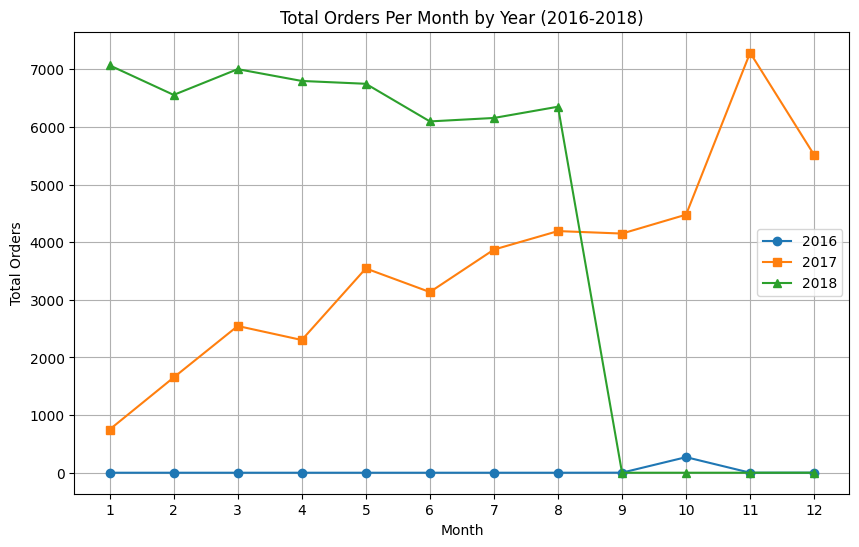

In [66]:
# Ambil jumlah pesanan per bulan di setiap tahun
order_2016_counts = order_in_2016['order_purchase_timestamp'].dt.month.value_counts().sort_index()
order_2017_counts = order_in_2017['order_purchase_timestamp'].dt.month.value_counts().sort_index()
order_2018_counts = order_in_2018['order_purchase_timestamp'].dt.month.value_counts().sort_index()

# Pastikan semua bulan 1-12 ada, isi dengan 0 jika bulan tertentu tidak ada data
order_2016_counts = order_2016_counts.reindex(range(1, 13), fill_value=0)
order_2017_counts = order_2017_counts.reindex(range(1, 13), fill_value=0)
order_2018_counts = order_2018_counts.reindex(range(1, 13), fill_value=0)

# Plot tiga garis terpisah untuk masing-masing tahun
plt.figure(figsize=(10, 6))
plt.plot(order_2016_counts.index, order_2016_counts.values, marker='o', linestyle='-', label='2016')
plt.plot(order_2017_counts.index, order_2017_counts.values, marker='s', linestyle='-', label='2017')
plt.plot(order_2018_counts.index, order_2018_counts.values, marker='^', linestyle='-', label='2018')

# Tambahkan label dan judul
plt.xlabel('Month')
plt.ylabel('Total Orders')
plt.title('Total Orders Per Month by Year (2016-2018)')
plt.xticks(range(1, 13))  # Menampilkan bulan dari 1 sampai 12
plt.legend()  # Menampilkan keterangan warna garis untuk setiap tahun
plt.grid(True)

# Tampilkan grafik
plt.show()


### 3. 2. Berapa persen pesanan yang diantarkan terlambat dibandingkan dengan total pesanan yang berhasil dikirim?

Berdasarkan analisis data, ditemukan bahwa 8.11% dari total pesanan mengalami keterlambatan dalam pengiriman, sementara 91.89% pesanan dikirim tepat waktu sesuai estimasi yang diberikan kepada pelanggan. Hal ini menunjukkan bahwa sebagian besar sistem pengiriman dalam platform e-commerce ini berjalan dengan baik dan sesuai jadwal. Namun, masih ada sekitar 8.11% pesanan yang tidak sampai tepat waktu, yang bisa berdampak pada kepuasan pelanggan.
Dengan angka keterlambatan yang masih di bawah 10%, platform ini sudah cukup efisien, tetapi ada peluang untuk mengoptimalkan layanan agar semakin mendekati 100% ketepatan waktu dalam pengiriman pesanan ke pelanggan.

#### Visualisai status order

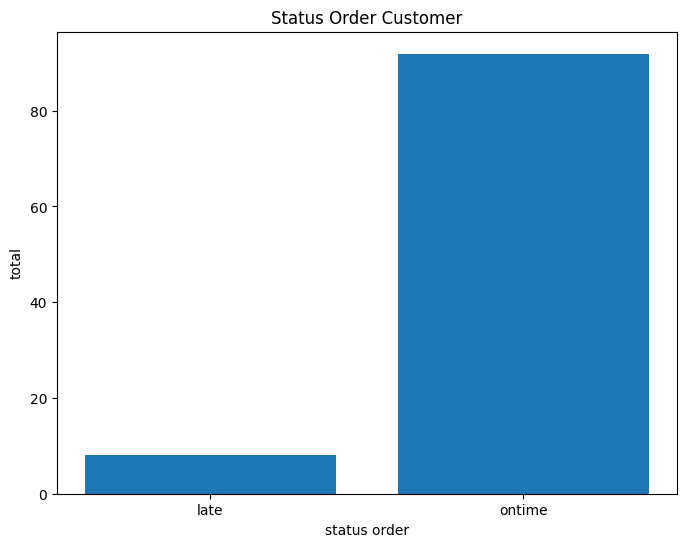

In [67]:
# visualisasi order status late atau ontime nya
plt.figure(figsize=(8, 6))
plt.xlabel('status order')
plt.ylabel('total')
plt.title('Status Order Customer')
plt.bar(info_late_ontime.index, info_late_ontime.values)
plt.show()

### Visualisasi Tambahan

#### Visualisasi Customer City

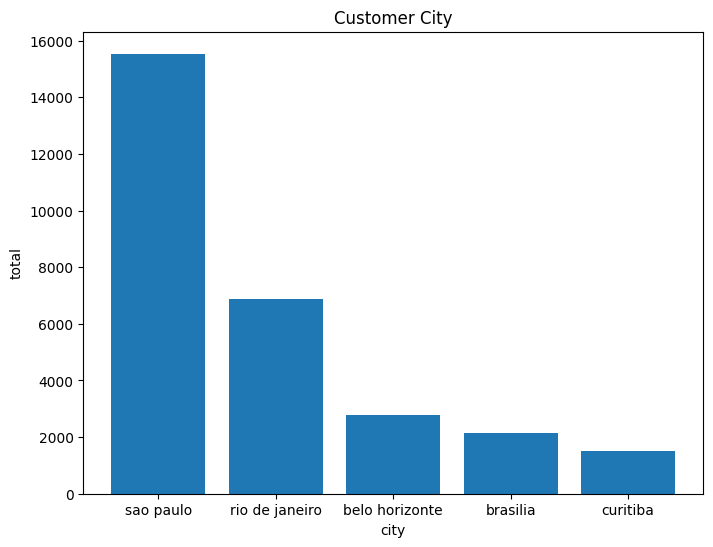

In [50]:
# Customer terbanyak berdasarkan kota nya
df_customer['customer_city'].value_counts().sort_values(ascending=False).head()
# visualisasi untuk mengetahui kota customer terbanyak
plt.figure(figsize=(8, 6))
plt.xlabel('city')
plt.ylabel('total')
plt.title('Customer City')
plt.bar(df_customer['customer_city'].value_counts().sort_values(ascending=False).head().index, df_customer['customer_city'].value_counts().sort_values(ascending=False).head().values)
plt.show()

#### Visualisai Payment Type

<BarContainer object of 4 artists>

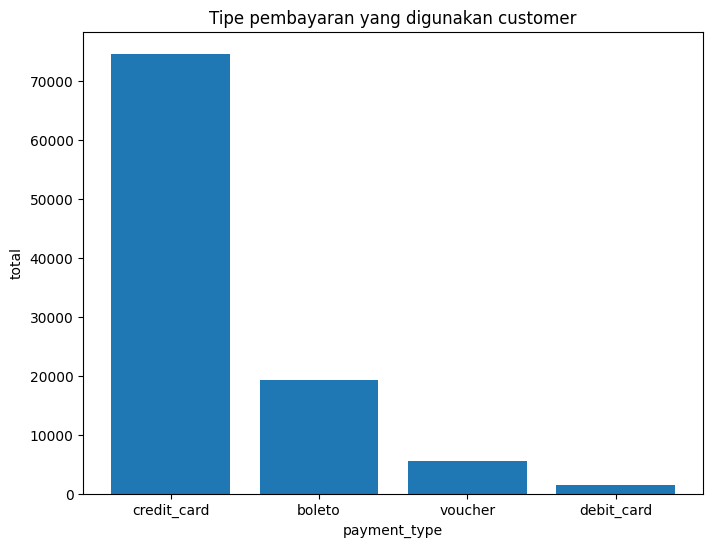

In [51]:
# Visualisasi untuk mengetahui payment type terbanyak
plt.figure(figsize=(8, 6))
plt.xlabel('payment_type')
plt.ylabel('total')
plt.title('Tipe pembayaran yang digunakan customer')
plt.bar(data_frames['E-Commerce Public Dataset/order_payments_dataset.csv']['payment_type'].value_counts().index, data_frames['E-Commerce Public Dataset/order_payments_dataset.csv']['payment_type'].value_counts().values)

#### Visualisasi Product yang dibeli Customer

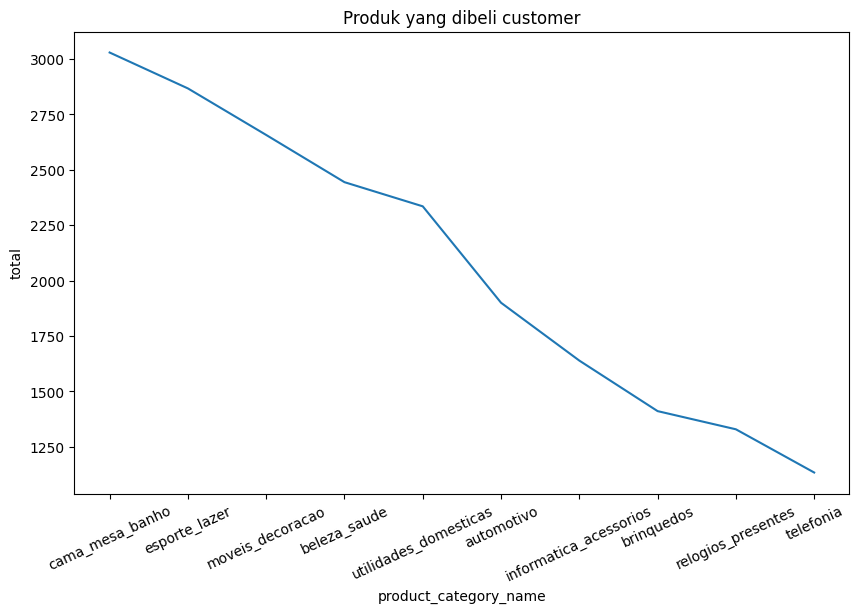

In [52]:
# Untuk mengetahui produk terbanyak yang dibeli oleh customer
plt.figure(figsize=(10, 6))
plt.xlabel('product_category_name')
plt.ylabel('total')
plt.title('Produk yang dibeli customer')
plt.plot(df_category['product_category_name'].value_counts().head(10).index, df_category['product_category_name'].value_counts().head(10).values)
plt.xticks(rotation=25)
plt.show()

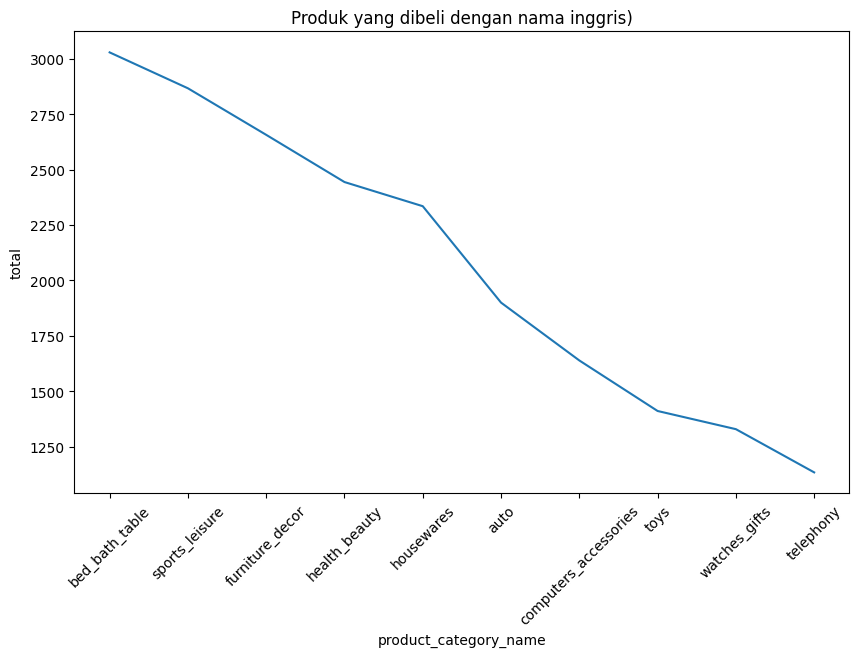

In [53]:
# Untuk mengetahui produk terbanyak yang dibeli oleh customer
plt.figure(figsize=(10, 6))
plt.xlabel('product_category_name')
plt.ylabel('total')
plt.title('Produk yang dibeli dengan nama inggris)')
plt.plot(df_category['product_category_name_english'].value_counts().head(10).index, df_category['product_category_name_english'].value_counts().head(10).values)
plt.xticks(rotation=45)
plt.show()

## RFM Analysis

In [54]:
# Merge 'payment_value' from 'df_order' to 'df_customer' based on 'order_id'
df_customer2 = pd.merge(df_customer, df_order[['order_id', 'payment_value']], on='order_id', how='left')

# Menghitung Recency: Selisih hari antara transaksi terakhir pelanggan dan reference_date
recency = df_customer2.groupby('customer_id')['order_purchase_timestamp'].max().reset_index()
recency['recency'] = (pd.to_datetime('today') - recency['order_purchase_timestamp']).dt.days # Assuming 'today' as reference_date

# Menghitung Frequency: Berapa kali pelanggan melakukan transaksi
frequency = df_customer2.groupby('customer_id')['order_purchase_timestamp'].count().reset_index()
frequency.columns = ['customer_id', 'frequency']

# Menghitung Monetary: Total uang yang dikeluarkan oleh pelanggan
# Assuming you have a column representing order value in 'df_customer'
# Replace 'payment_value' with the actual column name if different
monetary = df_customer2.groupby('customer_id')['payment_value'].sum().reset_index()
monetary.columns = ['customer_id', 'monetary']

# Menggabungkan ketiga nilai tersebut menjadi satu dataframe RFM
rfm = recency.merge(frequency, on='customer_id').merge(monetary, on='customer_id')

# Menampilkan hasil RFM
# Menampilkan hasil RFM
display(rfm)  # Jika menggunakan Jupyter Notebook
print(rfm.head())  # Jika menggunakan terminal atau environment lain


,customer_id,order_purchase_timestamp,recency,frequency,monetary
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,2678.0,1,114.74
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,2799.0,1,67.41
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,2937.0,1,195.42
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,2768.0,1,179.35
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,2539.0,1,107.01
...,...,...,...,...,...
99436,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,2543.0,3,81.36
99437,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,2489.0,1,63.13
99438,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,2467.0,1,214.13
99439,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,2751.0,2,91.00


                        customer_id order_purchase_timestamp  recency  \
0  00012a2ce6f8dcda20d059ce98491703      2017-11-14 16:08:26   2678.0   
1  000161a058600d5901f007fab4c27140      2017-07-16 09:40:32   2799.0   
2  0001fd6190edaaf884bcaf3d49edf079      2017-02-28 11:06:43   2937.0   
3  0002414f95344307404f0ace7a26f1d5      2017-08-16 13:09:20   2768.0   
4  000379cdec625522490c315e70c7a9fb      2018-04-02 13:42:17   2539.0   

   frequency  monetary  
0          1    114.74  
1          1     67.41  
2          1    195.42  
3          1    179.35  
4          1    107.01  


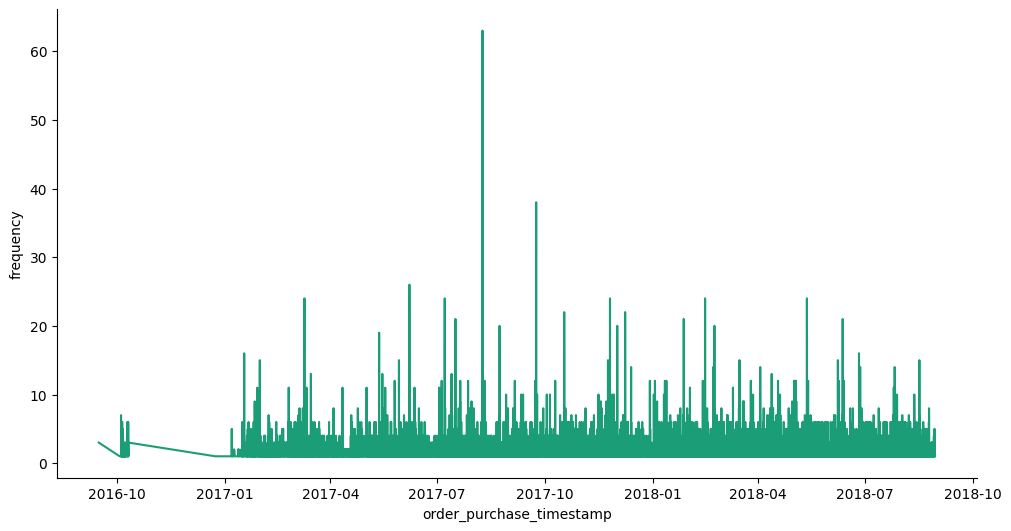

In [55]:
# @title order_purchase_timestamp vs frequency

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['order_purchase_timestamp']
  ys = series['frequency']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = rfm.sort_values('order_purchase_timestamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('order_purchase_timestamp')
_ = plt.ylabel('frequency')

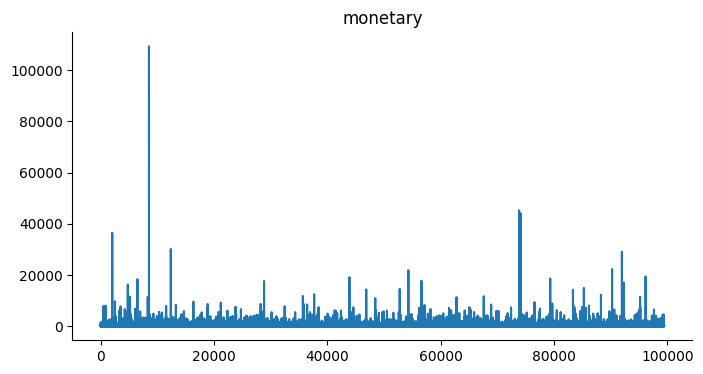

In [56]:
# @title monetary

from matplotlib import pyplot as plt
rfm['monetary'].plot(kind='line', figsize=(8, 4), title='monetary')
plt.gca().spines[['top', 'right']].set_visible(False)

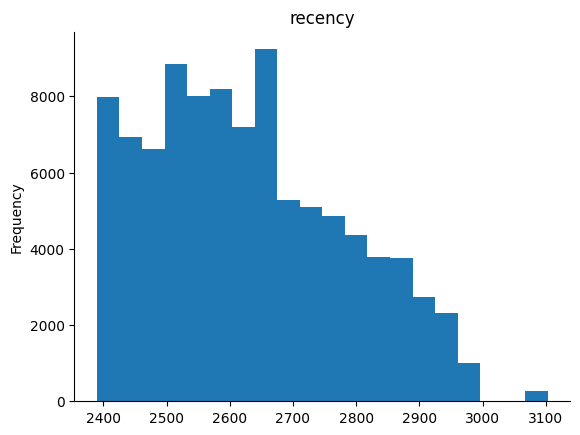

In [57]:
# @title recency

from matplotlib import pyplot as plt
rfm['recency'].plot(kind='hist', bins=20, title='recency')
plt.gca().spines[['top', 'right',]].set_visible(False)

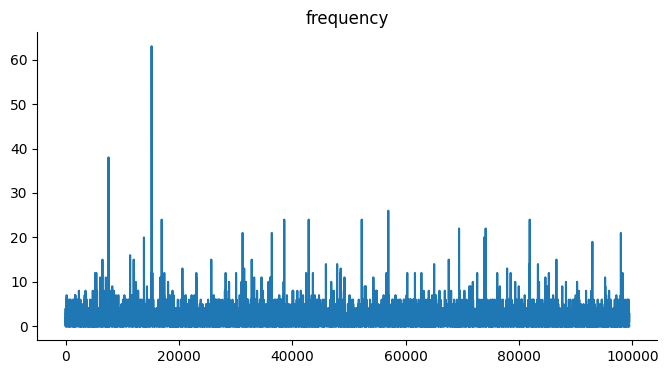

In [58]:
# @title frequency

from matplotlib import pyplot as plt
rfm['frequency'].plot(kind='line', figsize=(8, 4), title='frequency')
plt.gca().spines[['top', 'right']].set_visible(False)

## Conclusion

- Conclution pertanyaan 1
Data menunjukkan bahwa pada tahun 2016, jumlah transaksi masih tergolong rendah dan stabil, yang mengindikasikan bahwa e-commerce pada saat itu masih dalam tahap pertumbuhan. Tren penjualan mulai mengalami peningkatan bertahap sepanjang tahun 2017 sebelum akhirnya melonjak di akhir tahun. Namun, pada tahun 2018, terjadi penurunan tajam setelah bulan Agustus, yang mungkin disebabkan oleh beberapa faktor, seperti berkurangnya dorongan promosi setelah periode puncak, perubahan tren belanja konsumen, atau kondisi pasar yang kurang mendukung. Kemungkinan lainnya adalah adanya perubahan kebijakan dari platform e-commerce, persaingan yang semakin ketat, atau faktor eksternal seperti pelemahan daya beli masyarakat di paruh akhir 2018.
- Conclution pertanyaan 2
Analisis menunjukkan bahwa kategori produk "cama_mesa_banho" (perlengkapan tempat tidur dan kamar mandi) menjadi yang paling laris, dengan São Paulo (SP) sebagai wilayah dengan jumlah pesanan terbanyak, diikuti oleh Rio de Janeiro (RJ) dan Minas Gerais (MG). Hal ini mengindikasikan bahwa preferensi belanja pelanggan dapat dipengaruhi oleh daya beli di wilayah tertentu. Oleh karena itu, strategi pemasaran yang lebih tersegmentasi berdasarkan lokasi dan preferensi produk dapat membantu meningkatkan efektivitas kampanye penjualan dan optimasi distribusi produk.

## Download Clean Data

### Download bagian yang Explore Customer

In [59]:
# Download df_customer
df_customer.to_csv('cleaned_df_customer.csv', index=False)

# Download order tahun 2016, 2017, 2018
order_2016.to_csv('cleaned_order_2016.csv', index=False)
order_2017.to_csv('cleaned_order_2017.csv', index=False)
order_2018.to_csv('cleaned_order_2018.csv', index=False)

### Download bagian yang Explore Order Item

In [60]:
# Download df_order
df_order.to_csv('cleaned_df_order.csv', index=False)

### Download bagian yang Order Payment

In [61]:
# Download
data_frames['E-Commerce Public Dataset/order_payments_dataset.csv'].to_csv('cleaned_order_payments_dataset.csv', index=False)

### Download bagian yang Explore produk

In [62]:
df_product.to_csv('cleaned_df_product.csv', index=False)

### Download bagian yang Explore Seller

In [63]:
df_seller.to_csv('cleaned_df_seller.csv', index=False)

### Download bagian yang Explore Category

In [64]:
df_category.to_csv('cleaned_df_category.csv', index=False)

### Download Clean geolocation data

In [65]:
data_frames['E-Commerce Public Dataset/geolocation_dataset.csv'].to_csv('cleaned_geolocation_dataset.csv', index=False)